In [12]:
import os
import pandas as pd
import sys
import plotly.graph_objects as go

In [13]:
sys.path.append(os.path.abspath('../..'))

In [14]:
from analysis.preprocessing import load_and_clean_glaciers_data, load_and_clean_heat_data

# Charger les données
df_heat = load_and_clean_heat_data()  
df_glaciers = load_and_clean_glaciers_data()

# Calculer la moyenne des trois mesures de chaleur
df_heat["ocean_heat_avg"] = df_heat[[
    "ocean_heat_content_noaa_2000m", 
    "ocean_heat_content_mri_2000m", 
    "ocean_heat_content_iap_2000m"
]].mean(axis=1)

# Garder uniquement Year et la moyenne
df_heat = df_heat[["Year", "ocean_heat_avg"]]

# Fusionner avec les glaciers sur la colonne Year
df_combined = pd.merge(df_glaciers, df_heat, on="Year", how="inner")

print(df_combined.head())


   Year  Mean cumulative mass balance  Number of observations  ocean_heat_avg
0  1956                         0.000                     NaN      -10.958350
1  1957                        -0.094                    12.0      -11.425989
2  1958                        -0.963                    12.0       -7.922322
3  1959                        -1.431                    13.0       -9.655655
4  1960                        -2.008                    15.0       -7.208989


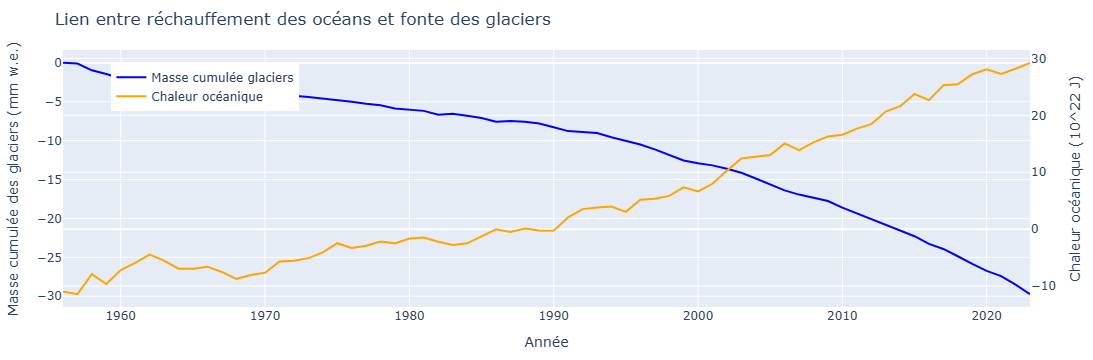

In [15]:


fig = go.Figure()

# Glacier
fig.add_trace(go.Scatter(
    x=df_combined["Year"],
    y=df_combined["Mean cumulative mass balance"],
    name="Masse cumulée glaciers",
    yaxis="y1",
    line=dict(color="blue")
))

# Chaleur océanique
fig.add_trace(go.Scatter(
    x=df_combined["Year"],
    y=df_combined["ocean_heat_avg"],
    name="Chaleur océanique",
    yaxis="y2",
    line=dict(color="orange")
))

# Layout double axe
fig.update_layout(
    title="Lien entre réchauffement des océans et fonte des glaciers",
    xaxis=dict(title="Année"),
    yaxis=dict(title="Masse cumulée des glaciers (mm w.e.)", side="left"),
    yaxis2=dict(title="Chaleur océanique (10^22 J)", overlaying="y", side="right"),
    legend=dict(x=0.05, y=0.95),
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


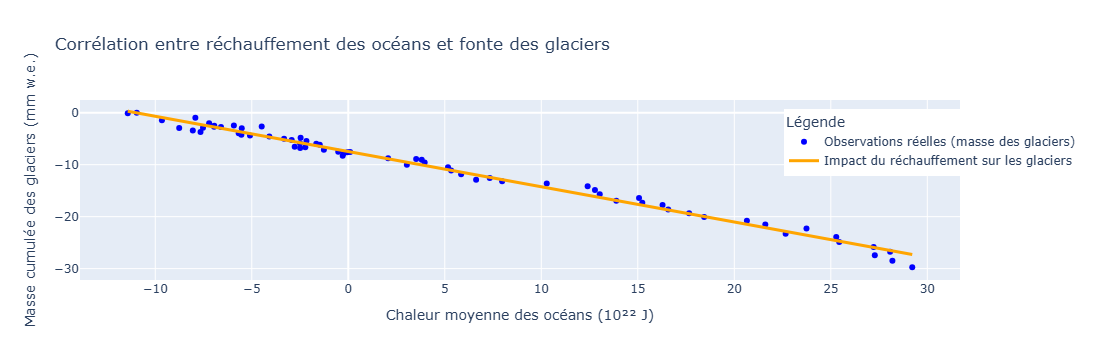

In [16]:
fig = go.Figure()

# Nuage de points (observations réelles)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    name="Observations réelles (masse des glaciers)",     
    marker=dict(color="blue")
))

# Ligne de régression (tendance)
fig.add_trace(go.Scatter(
    x=x,
    y=y_pred,
    mode="lines",
    name="Impact du réchauffement sur les glaciers",     
    line=dict(color="orange", width=3)
))

# Mettre à jour le layout avec noms des axes
fig.update_layout(
    title="Corrélation entre réchauffement des océans et fonte des glaciers",
    xaxis_title="Chaleur moyenne des océans (10²² J)",
    yaxis_title="Masse cumulée des glaciers (mm w.e.)",
    legend=dict(
        title="Légende",
        x=0.8,
        y=0.95
    )
)

fig.show()
